In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import struct
import matplotlib.pyplot as plt

In [114]:
def one_hot_encoding(y, num_labels):
    y_enc = tf.one_hot(y, num_labels, axis=-1)
    
    return y_enc

In [99]:
def load_data():
    with open('mnist/train-labels.idx1-ubyte', 'rb') as labels:
        magic, n = struct.unpack(">II", labels.read(8))
        train_labels = np.fromfile(labels, dtype=np.uint8)
    with open("mnist/train-images.idx3-ubyte", 'rb') as imgs:
        magic, num, nrows, ncols = struct.unpack(">IIII", imgs.read(16))
        train_images = np.fromfile(imgs, dtype=np.uint8).reshape(num, 28, 28, 1)
    with open('mnist/t10k-labels.idx1-ubyte', 'rb') as labels:
        magic, n = struct.unpack(">II", labels.read(8))
        test_labels = np.fromfile(labels, dtype=np.uint8)
    with open("mnist/t10k-images.idx3-ubyte", 'rb') as imgs:
        magic, num, nrows, ncols = struct.unpack(">IIII", imgs.read(16))
        test_images = np.fromfile(imgs, dtype=np.uint8).reshape(num, 28, 28, 1)

    return train_images, train_labels, test_images, test_labels

In [100]:
def load_dataset():
    X_train, Y_train, X_test, Y_test = load_data()

    X_train, X_test = X_train / 255, X_test / 255
    Y_train, Y_test = Y_train.reshape((Y_train.shape[0], 1)), Y_test.reshape((Y_test.shape[0], 1))

    return X_train, Y_train, X_test, Y_test

In [ ]:
def visualize_data(img_array, label_array, idx):
    fig, ax = plt.subplots(nrows=8, ncols=8, sharex=True, sharey=True)
    ax = ax.flatten()
    for i in range(64):
        img = img_array[i, :, :]
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title(f"t: {label_array[i]}")
    plt.show()

In [106]:
def create_model():
    model = keras.Sequential()
    model.add(layers.Conv2D(32, (3 ,3 ), activation='relu', input_shape=(28, 28, 1), name='conv2d_1'))
    model.add(layers.BatchNormalization(name='batch_norm_1'))
    model.add(layers.MaxPooling2D((2, 2), name='maxpool_1'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_2'))
    model.add(layers.BatchNormalization(name='batch_norm_2'))
    model.add(layers.MaxPooling2D((2, 2), name='maxpool_2'))
    model.add(layers.Flatten())
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(10))
    
    return model

In [118]:
X_train, Y_train, X_test, Y_test = load_dataset()
# Y_train, Y_test = one_hot_encoding(Y_train_orig, 10), one_hot_encoding(Y_test_orig, 10)

# # Reshape Y_train and Y_test
# Y_train = Y_train.reshape(Y_train.shape[0], Y_train.shape[-1])
# Y_test = Y_test.reshape(Y_test.shape[0], Y_test.shape[-1])

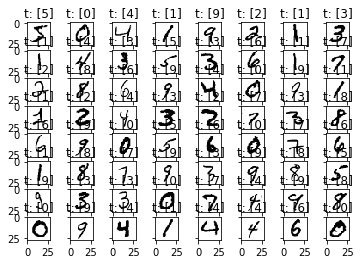

In [96]:
visualize_data(X_train, Y_train_orig, 5)

In [116]:
print(Y_train.shape, Y_test.shape)

(60000, 1, 10) (10000, 1, 10)


In [119]:
model = create_model()
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_norm_1 (BatchNormaliza (None, 26, 26, 32)        128       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_norm_2 (BatchNormaliza (None, 11, 11, 64)        256       
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)            

In [120]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [121]:
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1219 - accuracy: 0.9666 - val_loss: 0.0448 - val_accuracy: 0.9849
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0506 - accuracy: 0.9853 - val_loss: 0.0603 - val_accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0397 - accuracy: 0.9890 - val_loss: 0.0480 - val_accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0291 - accuracy: 0.9918 - val_loss: 0.0592 - val_accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0239 - accuracy: 0.9933 - val_loss: 0.0389 - val_accuracy: 0.9906
Epoch 6/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0214 - accuracy: 0.9942 - val_loss: 0.0613 - val_accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0124 - accuracy: 0.9963 - val_loss: 0.0743 -

313/313 - 2s - loss: 0.0454 - accuracy: 0.9915


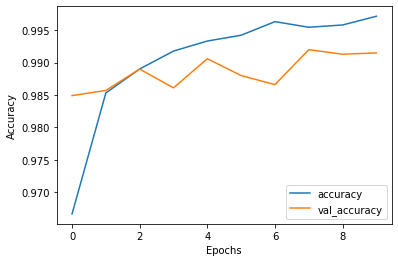

In [128]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
plt.show()

In [156]:
def predict(model, X, Y, imgs):
    s = int(np.sqrt(imgs))
    fig, ax = plt.subplots(s, s, sharex=True, sharey=True, figsize=(15 ,15))
    ax = ax.flatten()
    preds = model.predict(X[:imgs])
    for i in range(imgs):
        y_pred = np.argmax(preds[i])
        img = X[i].reshape(28, 28)
        ax[i].imshow(img, cmap="Greys", interpolation='nearest')
        ax[i].set_title(f't: {Y[i]} p: {y_pred}')
        

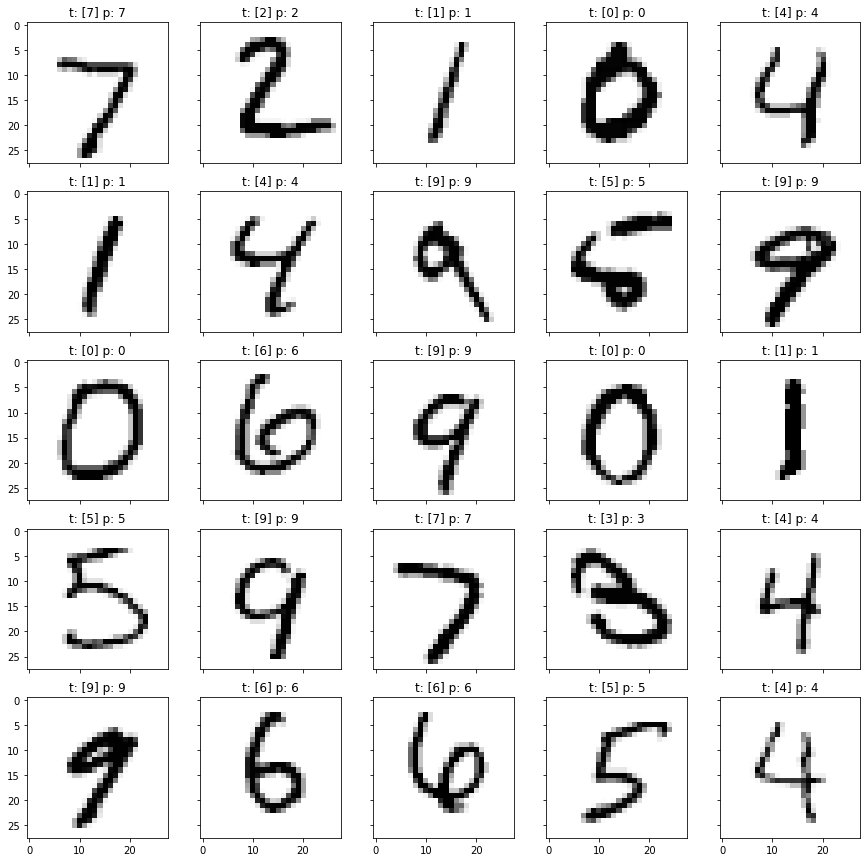

In [158]:
imgs = 25
preds = predict(model, X_test, Y_test, imgs)

In [159]:
# Save model
model.save("CNN_2")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: CNN_2\assets
